In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path1 = os.getcwd()

In [4]:
path1

'C:\\Users\\user\\Desktop\\usegit (1)\\pytest'

In [46]:
path = os.path.join(path1,'iris.csv')

In [47]:
data = pd.read_csv(path)

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
Y = data['class']
X = data.iloc[:,[1,2]]

In [54]:
X

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [9]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
pd.get_dummies(data)

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [11]:
XE= np.array(X)

In [12]:
np.unique(Y,return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [13]:
def train_test_split(X,Y,test_size = 0.25, random=False, random_seed=None):
    X = np.array(X)
    Y = np.array(Y)
    
    indices = np.array(range(len(X)))
                       
    test_size_len = round(X.shape[0]*test_size)
                       
    if random==True:
        if random_seed !=None:
            random_generator = np.random.RandomState(seed=random_seed)
            random_generator.shuffle(indices)
        
        else :
            np.random.shuffle(indices)
        
        test_indices = indices[0:test_size_len]
        train_indices = indices[test_size_len:]
        
        X_train = X[train_indices,:]
        Y_train = Y[train_indices]
        X_test = X[test_indices, :]
        Y_test = Y[test_indices]
                       
        
                       
    else:
        train_indices = indices[0:len(X)-test_size_len]
        test_indices = indices[len(X)-test_size_len:]
                       
        
        X_train = X[train_indices,:]
        Y_train = Y[train_indices]
        X_test = X[test_indices, :]
        Y_test = Y[test_indices]
                       
    return X_train, Y_train, X_test, Y_test
                       

In [14]:
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size=0.2,random=True, random_seed=50)

In [15]:
X_train.shape

(120, 4)

In [24]:
df1 = pd.DataFrame(X_train)

In [20]:
df1.colums

,0,1,2,3
0,7.2,3.2,6.0,1.8
1,5.1,2.5,3.0,1.1
2,6.1,2.8,4.7,1.2
3,6.7,3.3,5.7,2.5
4,5.1,3.7,1.5,0.4
...,...,...,...,...
115,5.9,3.2,4.8,1.8
116,6.4,2.8,5.6,2.2
117,5.5,4.2,1.4,0.2
118,7.2,3.6,6.1,2.5


In [21]:
df2=pd.DataFrame(X_test)

In [25]:
df3 = pd.concat([df1,df2],axis=0,ignore_index=True)

In [27]:
df3

,0,1,2,3
0,7.2,3.2,6.0,1.8
1,5.1,2.5,3.0,1.1
2,6.1,2.8,4.7,1.2
3,6.7,3.3,5.7,2.5
4,5.1,3.7,1.5,0.4
...,...,...,...,...
145,7.7,2.6,6.9,2.3
146,6.3,3.3,4.7,1.6
147,6.5,2.8,4.6,1.5
148,6.2,2.9,4.3,1.3


In [19]:
Y_train.shape

(120,)

In [20]:
def euclidean_dist(obs1,obs2):
    dist = np.sqrt(np.sum((obs1-obs2)**2))
    
    return round(dist,2)

In [21]:
obs1 =X_train[32,:]
obs2 =X_train[48,:]

In [22]:
euclidean_dist(obs1,obs2)

4.91

In [23]:
def search_neighbors(X_train,test_sample,k=5):
    dists_info = list()
    
    for index, train_sample in enumerate(X_train): #인덱스랑 같이 추출(enumerate)
        dist = euclidean_dist(train_sample, test_sample) 
        dists_info.append((train_sample,dist,index))
        
    dists_info.sort(key=lambda tupe:tupe[1]) ## 튜플을 넣어주고 튜플의 1번째 요소를 키로 넘겨줌 tupe 아니어도 상관 x
    neighbors = dists_info[:k]
    return neighbors

In [24]:
neighbors = search_neighbors(X_train,obs1,k=3)

In [25]:
def knn_predict(X_train, Y_train, test_sample,k=5):
    neighbors = search_neighbors(X_train,test_sample,k)
    neigh_index = [neigh[2] for neigh in neighbors]
    #neigh_index =list()
   #for neigh in neighbors:
        #neigh_index.append(neigh[2]) 식으로도 정의가능
    
    neigh_Y = Y_train[neigh_index]
    
    classes , counts = np.unique(neigh_Y,return_counts=True)
    pred = classes[np.argmax(counts)]
    return pred, neigh_Y

In [26]:
unique, count =np.unique(Y,return_counts=True)

In [27]:
np.argmax(count) #제일 큰 값을 갖는 원소의 인덱스뱉어줌

0

In [31]:
X_train

array([[5.5, 2.4, 3.7, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.8, 3. , 1.4, 0.1],
       [5.4, 3.9, 1.3, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.8, 5.1, 2.4],
       [4.5, 2.3, 1.3, 0.3],
       [5.5, 2.6, 4.4, 1.2],
       [7.1, 3. , 5.9, 2.1],
       [7.2, 3.6, 6.1, 2.5],
       [4.9, 3.1, 1.5, 0.1],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3.2, 1.2, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 3. , 4.9, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.9, 4.2, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 3.9, 1.2],
       [4.6, 3.6, 1. , 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2

In [33]:
test_sample = X_test[20,:]

In [38]:
pred , yn = knn_predict(X_train, Y_train, test_sample,k=5)

In [39]:
pred

'Iris-virginica'

In [37]:
yn

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [40]:
total_pred = list()

for index, test_sample in enumerate(X_test):
    pred, yn = knn_predict(X_train,Y_train,test_sample,k=5)
    
    total_pred.append(pred)

In [41]:
total_pred

['Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica']

In [42]:
Y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
total_accuracy = sum(total_pred==Y_test)/len(Y_test)

In [44]:
total_accuracy

1.0

In [45]:
total_error_rate = sum(total_pred!=Y_test)/len(Y_test)

In [46]:
total_error_rate

0.0

In [52]:
print('정확도 = {:.2f} \n오류율 = {:.2f}'.format(total_accuracy*100,total_error_rate*100))

정확도 = 100.00 
오류율 = 0.00


In [57]:
class Knn:

    def __init__(self,k=5):
        self.k = k
        self.neighbors = None
    
    def euclidean_dist(self, obs1,obs2):
        dist = np.sqrt(np.sum(obs1-obs2)**2)
        return np.round(dist,3)
    
    def search_neighbors(self,X_train,test_sample):
        dists_info = list()
        for index,train_sample in enumerate(X_train):
            dist = euclidean_dist(train_sample,test_sample)
            dists_info.append((train_sample,dist,index))
        
        dists_info.sort(key=lambda tupe:tupe[1])
        self.neighbors = dists_info[:self.k]
        
        return self.neighbors
    
    def predict(self,X_train,Y_train,test_sample):
        self.neighbors = self.search_neighbors(X_train,test_sample)
        neigh_index = [neigh[2] for neigh in self.neighbors]
        neigh_Y = Y_train[neigh_index]
        
        classes, counts = np.unique(neigh_Y,return_counts=True)
        pred = classes[np.argmax(counts)]
        return pred,neigh_Y

In [64]:
knn = Knn(5)

In [65]:
total_pred = list()
for index,test_sample in enumerate(X_test):
    pred, neigh_y = knn.predict(X_train,Y_train,test_sample)
    
    total_pred.append(pred)

In [66]:
total_accuracy = sum(total_pred==Y_test)/len(Y_test)
total_error_rate = sum(total_pred!=Y_test)/len(Y_test)

print('정확도 = {:.2f} \n오류율 = {:.2f}'.format(total_accuracy*100,total_error_rate*100))

정확도 = 90.00 
오류율 = 10.00


In [68]:
from sklearn.neighbors import KNeighborsClassifier as sk_Knn

In [69]:
sk_knn = sk_Knn(n_neighbors=5)

In [71]:
sk_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [72]:
i=20
test_sample= X_test[i,:]

In [74]:
test_sample.reshape(1,-1)

array([[6.3, 3.3, 6. , 2.5]])

In [76]:
sk_pred = sk_knn.predict(test_sample.reshape(1,-1))

In [77]:
sk_pred

array(['Iris-virginica'], dtype=object)

In [78]:
knn.predict(X_train,Y_train,test_sample)

('Iris-virginica',
 array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica'], dtype=object))

In [1]:
total_sk_pred = list()
for test_sample in X_test:
    sk_pred = sk_knn.predict(test_sample.reshape(1,-1))
    total_sk_pred.append(sk_pred)
    

NameError: name 'X_test' is not defined

Text(0, 0.5, 'length')

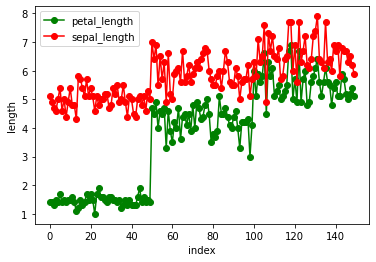

In [41]:
plt.plot(X['petal_length'],'go-',label='petal_length')
plt.plot(X['sepal_length '],'ro-',label='sepal_length')

plt.legend(loc='best')
plt.xlabel('index')
plt.ylabel('length')

In [50]:
c = pd.DataFrame(data['class']=='Iris-setosa')

In [51]:
c

,class
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


In [35]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
